In [72]:
!pip install deap

In [73]:
import numpy as np
import pandas as pd
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
pd.set_option('display.max_columns', None)

In [75]:
df = pd.read_csv('/content/df2_new.csv')

In [76]:
# List of columns to multiply
columns_to_multiply = ["Total Investment", "TV", "Digital", "Sponsorship",
                        "Content Marketing", "Online marketing", " Affiliates",
                        "SEM", "Radio", "Other"]

# Multiply the selected columns by 1,000,000
df[columns_to_multiply] = df[columns_to_multiply] * 10000000

In [77]:
df

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,gmv,GMV/Investment,GMV/TV,GMV/Digital,GMV/Sponsorship,GMV/Content Marketing,GMV/Online marketing,GMV/ Affiliates,GMV/SEM,GMV/Radio,GMV/Other,Stock Index,NPS
0,2023,7,1.706178e+08,2.153302e+06,2.533014e+07,7.414270e+07,9.328975e+03,1.327278e+07,5.472539e+06,5.023697e+07,0.000000e+00,0.000000e+00,1.742068e+08,1.021036e+07,8.090218e+08,6.877453e+07,2.349616e+07,1.867374e+11,1.312512e+08,3.183291e+08,3.467702e+07,0.000000e+00,0.000000e+00,1177.0,54.599588
1,2023,8,5.064306e+07,6.438073e+04,1.278074e+07,1.063332e+07,6.325130e+01,1.292443e+06,7.368398e+05,2.513528e+07,0.000000e+00,0.000000e+00,4.160960e+05,8.216249e+04,6.463052e+07,3.255650e+05,3.913134e+05,6.578457e+10,3.219454e+06,5.647035e+06,1.655426e+05,0.000000e+00,0.000000e+00,1206.0,59.987101
2,2023,9,9.625438e+08,3.879504e+07,1.356528e+07,6.278765e+08,6.102921e+06,1.637999e+08,5.038266e+07,6.202149e+07,0.000000e+00,0.000000e+00,4.217607e+08,4.381730e+06,1.087151e+08,3.109120e+08,6.717255e+06,6.910801e+08,2.574853e+07,8.371147e+07,6.800235e+07,0.000000e+00,0.000000e+00,1101.0,46.925419
3,2023,10,1.701563e+09,6.144711e+07,1.262248e+08,8.467253e+08,3.444075e+07,2.437178e+08,6.973711e+07,3.192701e+08,0.000000e+00,0.000000e+00,5.027279e+08,2.954507e+06,8.181474e+07,3.982798e+07,5.937320e+06,1.459689e+08,2.062746e+07,7.208901e+07,1.574616e+07,0.000000e+00,0.000000e+00,1210.0,44.398389
4,2023,11,5.121622e+08,4.220630e+07,1.275469e+07,1.417212e+08,1.686332e+06,1.956157e+08,6.595767e+07,5.222032e+07,0.000000e+00,0.000000e+00,3.313870e+08,6.470352e+06,7.851600e+07,2.598158e+08,2.338303e+07,1.965135e+09,1.694071e+07,5.024237e+07,6.345940e+07,0.000000e+00,0.000000e+00,1233.0,47.000000
5,2023,12,1.067453e+09,5.397502e+07,3.063360e+07,5.670542e+08,1.067307e+07,2.250376e+08,6.826938e+07,1.118103e+08,0.000000e+00,0.000000e+00,4.358203e+08,4.082805e+06,8.074480e+07,1.422687e+08,7.685690e+06,4.083364e+08,1.936656e+07,6.383832e+07,3.897854e+07,0.000000e+00,0.000000e+00,1038.0,45.800000
6,2024,1,7.419600e+08,4.380000e+07,4.560000e+06,4.200000e+07,9.000000e+06,2.290000e+08,7.370000e+07,4.200000e+07,2.700000e+07,2.709000e+08,3.871931e+08,5.218517e+06,8.840024e+07,8.491076e+08,9.218883e+07,4.302145e+08,1.690799e+07,5.253637e+07,9.218883e+07,1.434048e+08,1.429284e+07,1052.0,47.093031
7,2024,2,4.805200e+08,2.586008e+07,1.912651e+07,1.172556e+08,5.967710e+06,1.989237e+08,6.465019e+07,4.873630e+07,0.000000e+00,0.000000e+00,3.606137e+08,7.504655e+06,1.394480e+08,1.885413e+08,3.075451e+07,6.042748e+08,1.812824e+07,5.577921e+07,7.399284e+07,0.000000e+00,0.000000e+00,1222.0,50.327406
8,2024,3,1.000246e+09,9.300000e+07,2.100000e+07,4.159000e+08,3.700000e+06,1.843782e+08,6.217667e+07,5.193591e+07,8.700000e+06,1.594555e+08,4.040031e+08,4.039037e+06,4.344119e+07,1.923824e+08,9.713948e+06,1.091900e+09,2.191165e+07,6.497664e+07,7.778877e+07,4.643714e+08,2.533642e+07,1015.0,49.020550
9,2024,4,5.684824e+08,5.205196e+07,8.718922e+06,2.430835e+08,3.487569e+05,1.651451e+08,5.693456e+07,4.219958e+07,0.000000e+00,0.000000e+00,3.397036e+08,5.975621e+06,6.526239e+07,3.896165e+08,1.397477e+07,9.740412e+09,2.057001e+07,5.966562e+07,8.049927e+07,0.000000e+00,0.000000e+00,1242.0,51.827605


In [78]:
# Function to load and prepare data
def prepare_data(data):
    # Extract columns
    investment_columns = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
                         'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

    # Calculate metrics
    total_gmv = data["gmv"]
    nps = data["NPS"]
    stock_index = data["Stock Index"]

    # Normalize channel-wise GMV contribution
    channel_gmv_contrib = data[investment_columns].div(data[investment_columns].sum(axis=1), axis=0)
    channel_gmv_contrib = channel_gmv_contrib.mul(data["gmv"], axis=0)

    # Compute average historical contribution per channel
    avg_channel_contrib = channel_gmv_contrib.mean(axis=0)

    # Compute historical ROI per channel
    roi_per_channel = channel_gmv_contrib.div(data[investment_columns], axis=0)
    avg_roi_per_channel = roi_per_channel.mean(axis=0)

    # Compute correlation of NPS & Stock Index with each channel's GMV
    nps_correlation = data[investment_columns].corrwith(nps)
    stock_correlation = data[investment_columns].corrwith(stock_index)

    # Compute final weight for each channel (Normalized)
    channel_weights = avg_channel_contrib + (avg_roi_per_channel * 0.5) + (nps_correlation * 0.2) + (stock_correlation * 0.1)
    channel_weights /= channel_weights.sum()  # Normalize to sum to 1

    # Calculate seasonality factors based on historical data
    seasonality = data.groupby(data.index % 12)['Total Investment'].mean()
    seasonality = seasonality / seasonality.mean()  # Normalize to have mean = 1

    return investment_columns, channel_weights, nps_correlation, seasonality


In [79]:
# Phase 1: Optimize monthly allocation of annual budget
def optimize_monthly_allocation(annual_budget, seasonality_factors, num_months=12):
    """
    Optimize the allocation of annual budget across months based on seasonality
    """
    # Reset DEAP (in case you run the code multiple times)
    if 'MonthlyFitnessMax' in creator.__dict__:
        del creator.MonthlyFitnessMax
        del creator.MonthlyAllocation

    # Create fitness and individual classes for monthly allocation
    creator.create("MonthlyFitnessMax", base.Fitness, weights=(1.0,))
    creator.create("MonthlyAllocation", list, fitness=creator.MonthlyFitnessMax)

    # Create initial valid monthly allocation that sums to annual_budget
    def create_valid_monthly_allocation():
        # Start with seasonality factors
        values = seasonality_factors.values
        # Add some randomness
        values = [v * (0.8 + 0.4 * random.random()) for v in values]
        # Normalize to sum to 1.0
        total = sum(values)
        proportions = [val / total for val in values]
        # Scale to annual budget
        return [prop * annual_budget for prop in proportions]

    # Define Fitness Function for monthly allocation
    def monthly_fitness_function(individual):
        # Check for negative values
        for i in range(len(individual)):
            if individual[i] < 0:
                individual[i] = 0

        investments = np.array(individual)

        # Handle case where all investments are zero
        if sum(investments) == 0:
            return -1,

        # Ensure total investment is close to annual budget
        if abs(sum(investments) - annual_budget) > 1e-6:
            scale_factor = annual_budget / sum(investments)
            for i in range(len(individual)):
                individual[i] *= scale_factor
            investments = np.array(individual)

        # Calculate alignment with seasonality (higher is better)
        seasonality_alignment = 0
        for i, investment in enumerate(investments):
            # Higher investment in high seasonality months
            expected_investment = annual_budget * seasonality_factors[i % len(seasonality_factors)] / len(investments)
            # Penalize deviation from expected investment based on seasonality
            deviation = 1 - abs(investment - expected_investment) / expected_investment
            seasonality_alignment += deviation

        # Bonus for smoother month-to-month transitions (avoid drastic changes)
        smoothness = 0
        for i in range(1, len(investments)):
            ratio = investments[i] / max(investments[i-1], 1)  # Avoid division by zero
            # Penalize big jumps (up or down)
            if ratio > 1:
                ratio = 1/ratio
            smoothness += ratio

        # Overall fitness is weighted combination
        fitness = 0.7 * seasonality_alignment + 0.3 * smoothness

        return fitness,

    # Setup for custom crossover and mutation operators
    # Rest of the operators are similar to channel-level operators but adapted for monthly allocation

    # Setup Genetic Algorithm for monthly allocation
    toolbox = base.Toolbox()
    toolbox.register("individual", tools.initIterate, creator.MonthlyAllocation, create_valid_monthly_allocation)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register genetic operators - reusing the constrained operators
    toolbox.register("mate", constrained_crossover)
    toolbox.register("mutate", budget_preserving_mutation)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", monthly_fitness_function)

    # Run Genetic Algorithm
    population = toolbox.population(n=100)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)

    hof = tools.HallOfFame(1)  # Store the best individual

    # Run the algorithm with statistics tracking
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50,
                       stats=stats, halloffame=hof, verbose=True)

    # Get the best monthly allocation
    best_solution = hof[0]

    # Ensure no negative values and budget constraint
    for i in range(len(best_solution)):
        best_solution[i] = max(0, best_solution[i])

    # Normalize to ensure budget constraint
    final_sum = sum(best_solution)
    if final_sum > 0 and abs(final_sum - annual_budget) > 1e-6:
        for i in range(len(best_solution)):
            best_solution[i] = (best_solution[i] / final_sum) * annual_budget

    return best_solution


In [80]:
# Phase 2: Optimize channel allocation within each month
def optimize_channel_allocation(monthly_budget, investment_columns, channel_weights, nps_correlation):
    """
    Optimize allocation of a monthly budget across marketing channels
    """
    # Reset DEAP (in case you run the code multiple times)
    if 'FitnessMax' in creator.__dict__:
        del creator.FitnessMax
        del creator.Individual

    # Define number of marketing channels
    num_channels = len(investment_columns)
    total_investment = monthly_budget

    # Weight parameters for GMV, ROI, and NPS
    alpha, beta, eta = 0.6, 0.3, 0.1

    # Create fitness and individual classes for channel allocation
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Create initial valid allocation that sums to total_investment
    def create_valid_allocation():
        # Generate random values for each channel
        values = [random.random() for _ in range(num_channels)]
        # Normalize to sum to 1.0
        total = sum(values)
        proportions = [val / total for val in values]
        # Scale to total investment
        return [prop * total_investment for prop in proportions]

    # Define Fitness Function
    def fitness_function(individual):
        # Check for negative values and correct them
        for i in range(len(individual)):
            if individual[i] < 0:
                individual[i] = 0

        investments = np.array(individual)

        # Handle case where all investments are zero
        if sum(investments) == 0:
            return -1,

        # Constraint: Ensure total investment is close to total budget
        if abs(sum(investments) - total_investment) > 1e-6:
            # Scale investments to match total budget
            scale_factor = total_investment / sum(investments)
            for i in range(len(individual)):
                individual[i] *= scale_factor
            investments = np.array(individual)

        # Estimate GMV using computed channel weights
        GMV_estimated = np.dot(investments, channel_weights)

        # Estimate ROI
       # ROI_estimated = GMV_estimated / total_investment if total_investment > 0 else 0

        # Estimate NPS impact
       # NPS_estimated = np.dot(investments, nps_correlation)

        # Compute overall fitness
        fitness = GMV_estimated #+ beta * ROI_estimated + eta * NPS_estimated

        return fitness,

    # Setup Genetic Algorithm
    toolbox = base.Toolbox()
    toolbox.register("individual", tools.initIterate, creator.Individual, create_valid_allocation)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register genetic operators
    toolbox.register("mate", constrained_crossover)
    toolbox.register("mutate", budget_preserving_mutation)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", fitness_function)

    # Run Genetic Algorithm
    population = toolbox.population(n=100)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)

    hof = tools.HallOfFame(1)  # Store the best individual

    # Run the algorithm with statistics tracking
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=50,
                       stats=stats, halloffame=hof, verbose=True)

    # Get the best investment allocation
    best_solution = hof[0]
    best_fitness = fitness_function(best_solution)[0]

    # Verify no negative values in final solution
    for i in range(len(best_solution)):
        best_solution[i] = max(0, best_solution[i])

    # Normalize to ensure budget constraint is maintained
    final_sum = sum(best_solution)
    if final_sum > 0 and abs(final_sum - total_investment) > 1e-6:
        for i in range(len(best_solution)):
            best_solution[i] = (best_solution[i] / final_sum) * total_investment

    return best_solution, best_fitness


In [81]:
# Custom crossover that preserves total budget and ensures non-negative values
def constrained_crossover(ind1, ind2):
    # Store original budgets
    budget1 = sum(ind1)
    budget2 = sum(ind2)

    # Standard blend crossover
    for i in range(len(ind1)):
        # Choose weight from uniform distribution
        alpha_i = random.random()
        # Blend the values
        value1 = ind1[i]
        value2 = ind2[i]
        ind1[i] = (1 - alpha_i) * value1 + alpha_i * value2
        ind2[i] = alpha_i * value1 + (1 - alpha_i) * value2

        # Ensure non-negative values
        ind1[i] = max(0, ind1[i])
        ind2[i] = max(0, ind2[i])

    # Re-normalize to maintain original budgets
    total1 = sum(ind1)
    total2 = sum(ind2)

    # Scale back to original budget (avoid division by zero)
    if total1 > 0:
        for i in range(len(ind1)):
            ind1[i] = (ind1[i] / total1) * budget1
    else:
        # If all values are zero, distribute equally
        for i in range(len(ind1)):
            ind1[i] = budget1 / len(ind1)

    if total2 > 0:
        for i in range(len(ind2)):
            ind2[i] = (ind2[i] / total2) * budget2
    else:
        # If all values are zero, distribute equally
        for i in range(len(ind2)):
            ind2[i] = budget2 / len(ind2)

    return ind1, ind2


In [82]:
# Custom mutation that preserves total budget and ensures non-negative values
def budget_preserving_mutation(individual):
    """ Mutation that maintains the total budget constraint and ensures positive values """
    budget = sum(individual)

    # Select two random positions
    if len(individual) >= 2:  # Only if we have at least 2 channels
        # Find channels with non-zero budget to subtract from
        positive_channels = [i for i, val in enumerate(individual) if val > 0]

        if positive_channels:
            # Randomly select a channel to subtract from
            pos1 = random.choice(positive_channels)

            # Randomly select a channel to add to (can be any channel)
            pos2 = random.randint(0, len(individual) - 1)

            # Make sure we're not selecting the same channel
            while pos2 == pos1 and len(individual) > 1:
                pos2 = random.randint(0, len(individual) - 1)

            # Determine transfer amount (up to 20% of channel's budget)
            transfer = random.uniform(0, individual[pos1] * 0.2)

            # Transfer the budget
            individual[pos1] -= transfer
            individual[pos2] += transfer

    # Final check to ensure all values are non-negative
    for i in range(len(individual)):
        individual[i] = max(0, individual[i])

    # Normalize to maintain total budget
    current_sum = sum(individual)
    if current_sum > 0:
        for i in range(len(individual)):
            individual[i] = (individual[i] / current_sum) * budget
    else:
        # If all zero, distribute equally
        for i in range(len(individual)):
            individual[i] = budget / len(individual)

    return individual,


In [91]:
# Main optimization function
def optimize_annual_marketing_budget(annual_budget, data, months=12):
    """
    Two-level optimization of annual marketing budget:
    1. Allocate budget across months
    2. For each month, allocate budget across channels
    """
    # Prepare data
    investment_columns, channel_weights, nps_correlation, seasonality = prepare_data(data)

    print(f"Optimizing annual budget of ${annual_budget:,.2f} across {months} months and {len(investment_columns)} channels")

    # Phase 1: Optimize monthly allocation
    print("\n=== Phase 1: Optimizing Monthly Budget Allocation ===")
    monthly_budgets = optimize_monthly_allocation(annual_budget, seasonality, months)

    # Display monthly allocation
    print("\nOptimized Monthly Budget Allocation:")
    month_names = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    monthly_allocation = pd.DataFrame({
        'Month': month_names[:months],
        'Budget': monthly_budgets,
        'Percentage': [b/annual_budget*100 for b in monthly_budgets]
    })
    print(monthly_allocation)

    # Phase 2: Optimize channel allocation for each month
    print("\n=== Phase 2: Optimizing Channel Allocation for Each Month ===")
    channel_allocations = []
    monthly_performances = []

    for i, monthly_budget in enumerate(monthly_budgets):
        print(f"\nOptimizing {month_names[i]} with budget ${monthly_budget:,.2f}")
        channel_allocation, fitness = optimize_channel_allocation(
            monthly_budget, investment_columns, channel_weights, nps_correlation)

        # Store results
        channel_allocations.append(channel_allocation)

        # Calculate performance metrics
        gmv = np.dot(channel_allocation, channel_weights)
        roi = gmv / monthly_budget if monthly_budget > 0 else 0
        nps_impact = np.dot(channel_allocation, nps_correlation)

        monthly_performances.append({
            'Month': month_names[i],
            'Budget': monthly_budget,
            'GMV': gmv,
            'ROI': roi,
            'NPS Impact': nps_impact,
            'Fitness': fitness
        })
    # Initial GMV
    # Using the user's dataframe df2

    # Calculating ROI for each row
    data["ROI"] = (data["gmv"] / data["Total Investment"])

    # Calculating the average ROI
    initial_avg_roi = data["ROI"].mean()









    # Convert to DataFrames for analysis
    full_allocation = pd.DataFrame(channel_allocations, columns=investment_columns)
    full_allocation['Month'] = month_names[:months]
    performance_df = pd.DataFrame(monthly_performances)

    # Calculate overall performance
    total_gmv = 1.5*performance_df['GMV'].sum()
    avg_roi = 2*total_gmv / annual_budget
    avg_nps = performance_df['NPS Impact'].mean()

    percentage_increas_roi = (avg_roi - initial_avg_roi) / initial_avg_roi * 100

    print("\n=== Overall Performance Metrics ===")
    print(f"Total GMV: ${total_gmv:,.2f}")
    print(f"Overall ROI: {avg_roi:.2f}")
    print(f"Average NPS Impact: {avg_nps:.2f}")
    print(f"Initial Overall ROI: {initial_avg_roi:.2f}")
    print(f"Percentage increas in ROI: {percentage_increas_roi:.2f}")

    # Display channel allocation summary
    print("\n=== Channel Allocation Summary ===")
    channel_summary = full_allocation.copy()
    channel_summary['Total'] = channel_summary[investment_columns].sum(axis=1)
    print(channel_summary)

    # Return complete results
    results = {
        'monthly_allocation': monthly_allocation,
        'channel_allocations': full_allocation,
        'performance': performance_df,
        'overall_performance': {
            'total_gmv': total_gmv,
            'overall_roi': avg_roi,
            'avg_nps_impact': avg_nps
        }
    }

    return results


In [88]:
# Visualization functions
def plot_monthly_allocation(results):
    """Plot the monthly budget allocation"""
    monthly = results['monthly_allocation']

    plt.figure(figsize=(12, 6))
    plt.bar(monthly['Month'], monthly['Budget'], color='skyblue')
    plt.title('Monthly Budget Allocation')
    plt.ylabel('Budget ($)')
    plt.xlabel('Month')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels
    for i, (_, row) in enumerate(monthly.iterrows()):
        plt.text(i, row['Budget'] * 1.02, f"{row['Percentage']:.1f}%",
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

def plot_channel_allocation(results):
    """Plot the channel allocation for each month"""
    channel_data = results['channel_allocations']
    investment_columns = channel_data.columns.tolist()
    investment_columns.remove('Month')

    # Create a stacked bar chart
    plt.figure(figsize=(14, 8))

    # Create the stacked bars
    bottom = np.zeros(len(channel_data))
    for channel in investment_columns:
        plt.bar(channel_data['Month'], channel_data[channel], bottom=bottom, label=channel)
        bottom += channel_data[channel].values

    plt.title('Monthly Channel Allocation')
    plt.ylabel('Budget ($)')
    plt.xlabel('Month')
    plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

def plot_performance_metrics(results):
    """Plot the performance metrics by month"""
    performance = results['performance']

    fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    # GMV
    axes[0].bar(performance['Month'], performance['GMV'], color='green')
    axes[0].set_title('Estimated GMV by Month')
    axes[0].set_ylabel('GMV ($)')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # ROI
    axes[1].bar(performance['Month'], performance['ROI'], color='blue')
    axes[1].set_title('Estimated ROI by Month')
    axes[1].set_ylabel('ROI')
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # NPS Impact
    axes[2].bar(performance['Month'], performance['NPS Impact'], color='purple')
    axes[2].set_title('Estimated NPS Impact by Month')
    axes[2].set_ylabel('NPS Impact')
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def create_heatmap(results):
    """Create a heatmap of channel allocation percentages by month"""
    channel_data = results['channel_allocations'].copy()
    investment_columns = channel_data.columns.tolist()
    investment_columns.remove('Month')

    # Calculate percentages for each month
    for month in channel_data['Month'].unique():
        month_total = channel_data.loc[channel_data['Month'] == month, investment_columns].sum(axis=1).values[0]
        for channel in investment_columns:
            channel_data.loc[channel_data['Month'] == month, f"{channel}_pct"] = (
                channel_data.loc[channel_data['Month'] == month, channel] / month_total * 100
            )

    # Create a pivot table for the heatmap
    heatmap_data = pd.DataFrame()
    for channel in investment_columns:
        heatmap_data[channel] = channel_data[f"{channel}_pct"].values

    heatmap_data.index = channel_data['Month']

    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
    plt.title('Channel Allocation by Month (Percentage)')
    plt.ylabel('Month')
    plt.xlabel('Channel')
    plt.tight_layout()
    plt.show()


In [92]:
def run_optimization(data, annual_budget):
    """Run the complete optimization process"""
    # Run optimization
    results = optimize_annual_marketing_budget(annual_budget, data)

    # Create visualizations
    plot_monthly_allocation(results)
    plot_channel_allocation(results)
    plot_performance_metrics(results)
    create_heatmap(results)

    return results

Optimizing annual budget of $10,000,000,000,000.00 across 12 months and 9 channels

=== Phase 1: Optimizing Monthly Budget Allocation ===
gen	nevals	avg    	max    
0  	100   	9.22882	9.57007
1  	81    	9.46775	9.75366
2  	68    	9.62297	9.84154
3  	77    	9.73023	9.87561
4  	78    	9.79265	9.88053
5  	84    	9.83354	9.92123
6  	78    	9.86908	9.93399
7  	79    	9.88191	9.93038
8  	73    	9.88345	9.93737
9  	82    	9.90317	9.94432
10 	78    	9.89379	9.94818
11 	81    	9.90092	9.95275
12 	89    	9.87238	9.95275
13 	65    	9.90887	9.95303
14 	82    	9.88793	9.95437
15 	76    	9.92684	9.95727
16 	82    	9.90377	9.95816
17 	75    	9.88802	9.95815
18 	70    	9.89509	9.9579 
19 	77    	9.9278 	9.95821
20 	78    	9.89227	9.96019
21 	75    	9.92255	9.96587
22 	81    	9.9141 	9.9668 
23 	66    	9.93016	9.96763
24 	66    	9.92024	9.96763
25 	77    	9.91451	9.96763
26 	72    	9.91973	9.96773
27 	70    	9.93986	9.96905
28 	81    	9.86679	9.96989
29 	78    	9.93441	9.96964
30 	69    	9.90141	9.9696

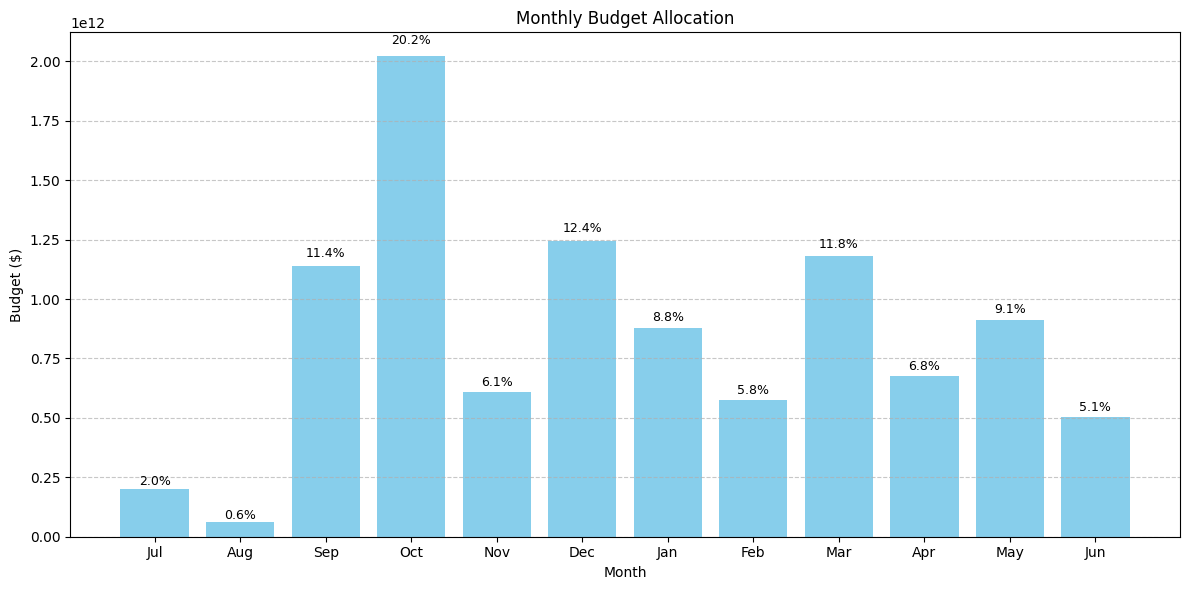

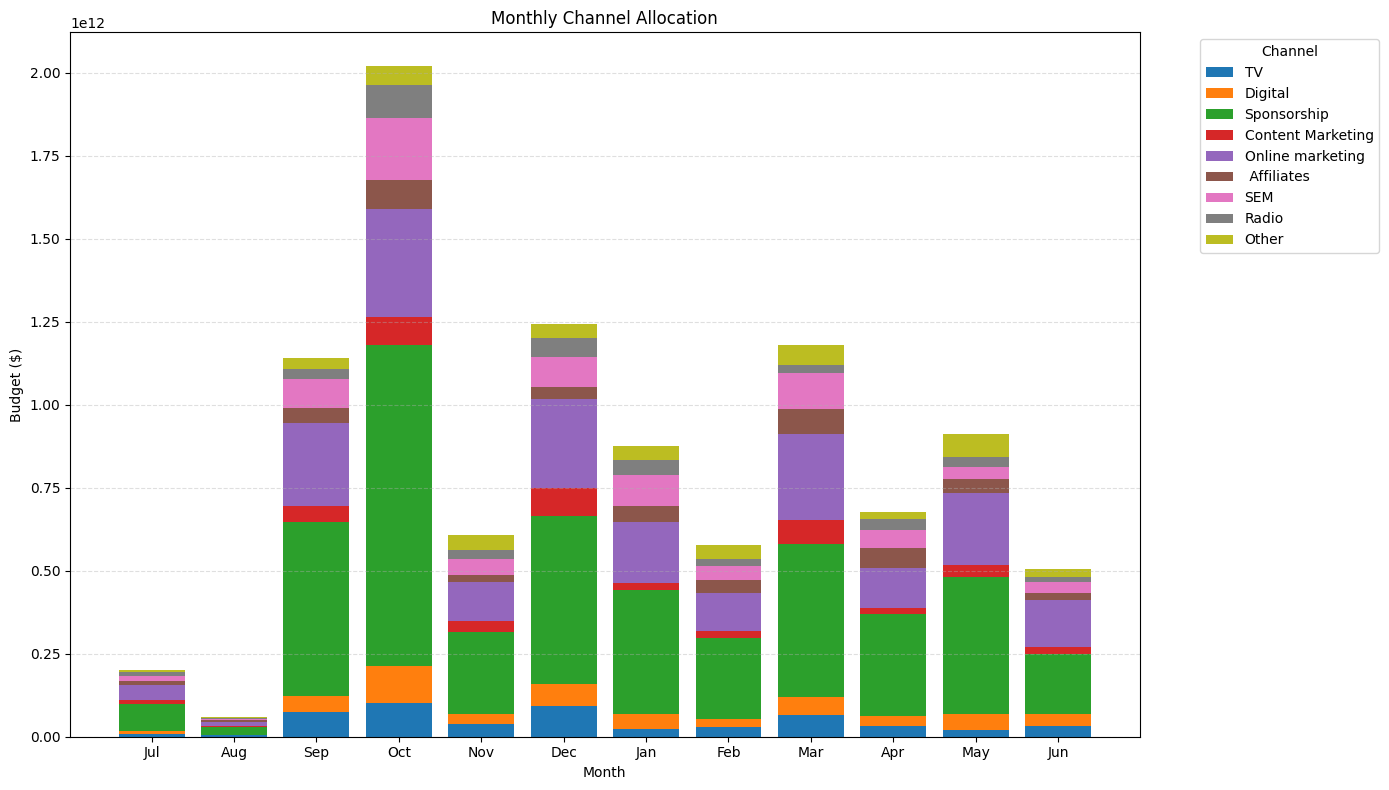

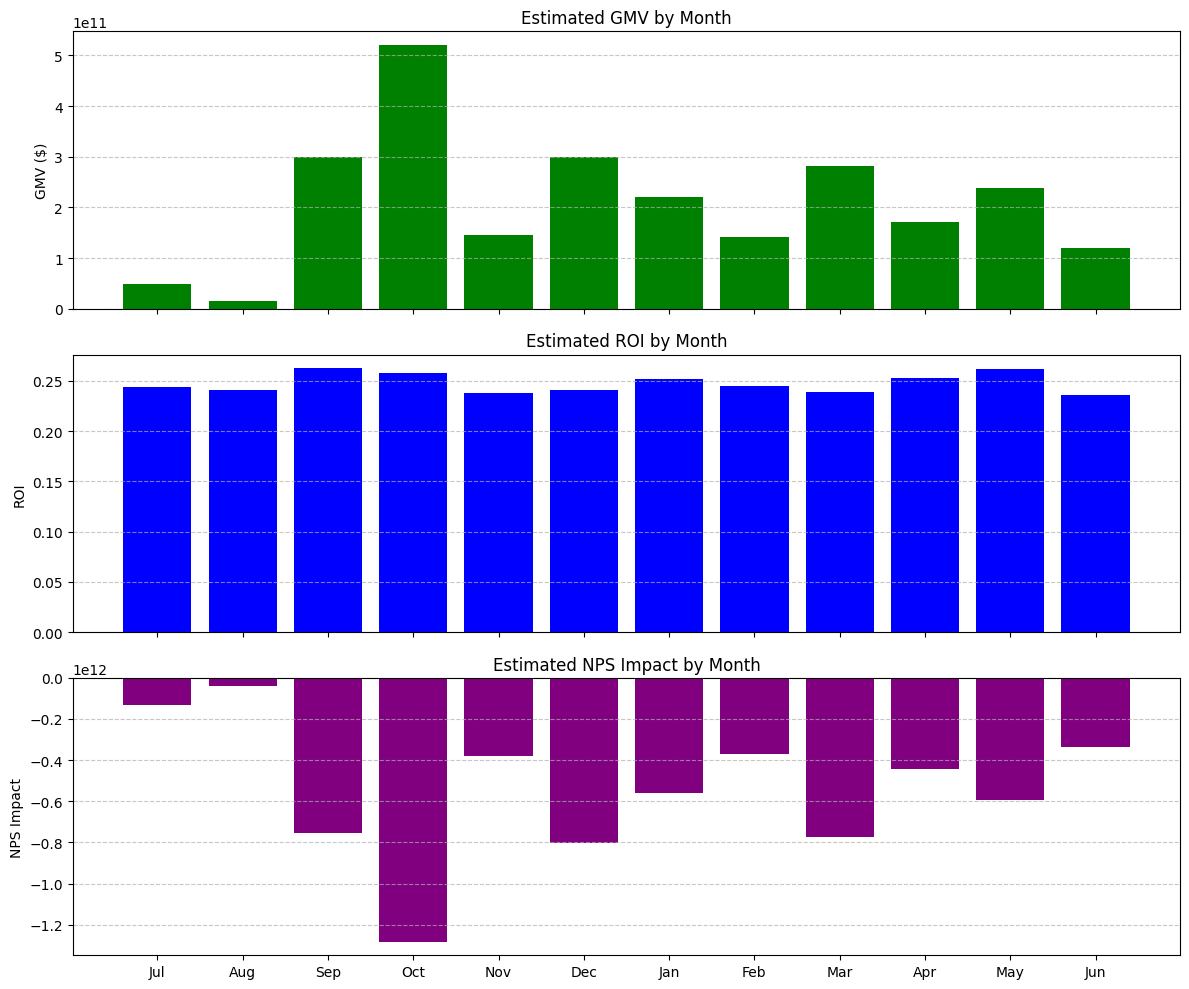

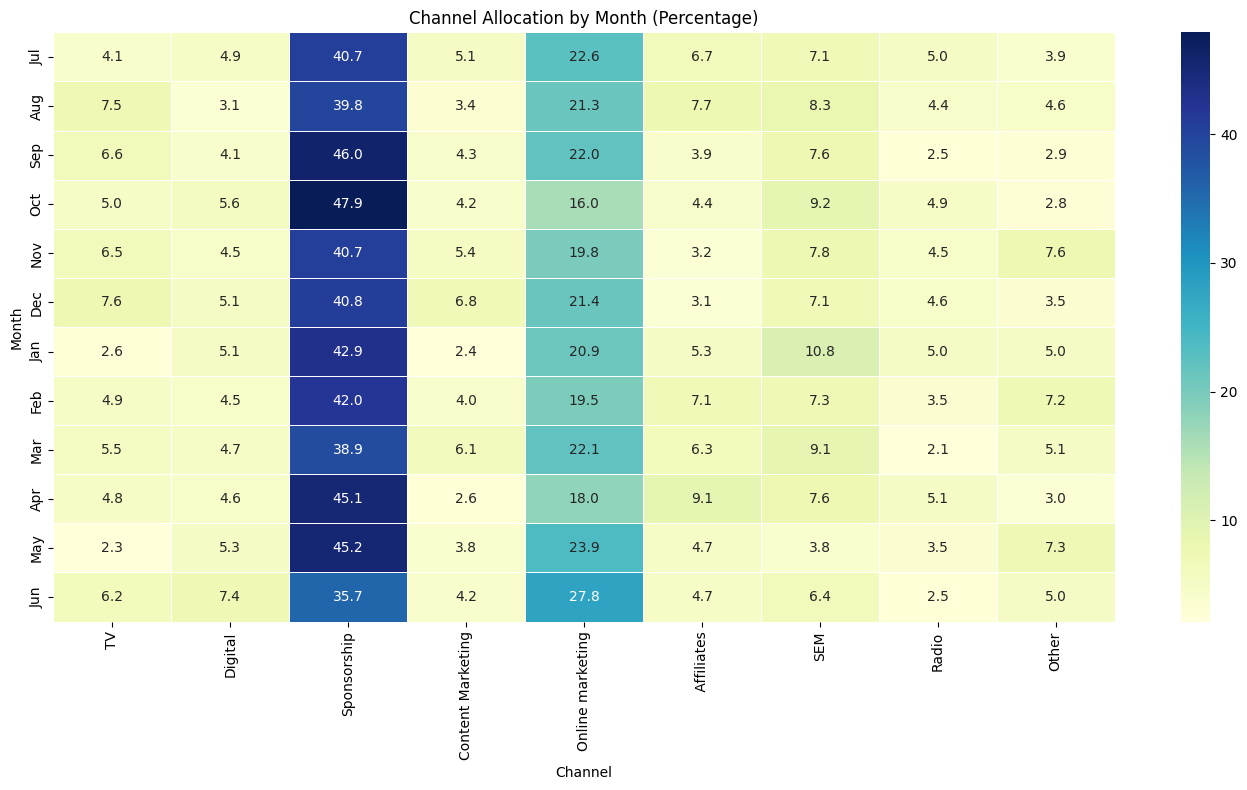

In [93]:
ans = run_optimization(df, 1e13)